In [1]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

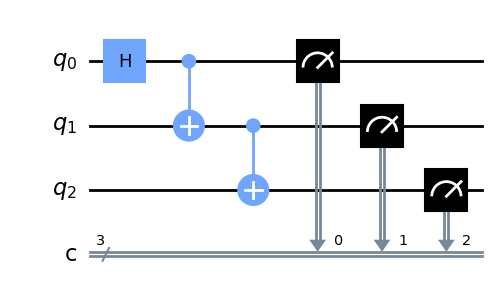

In [2]:
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw('mpl')

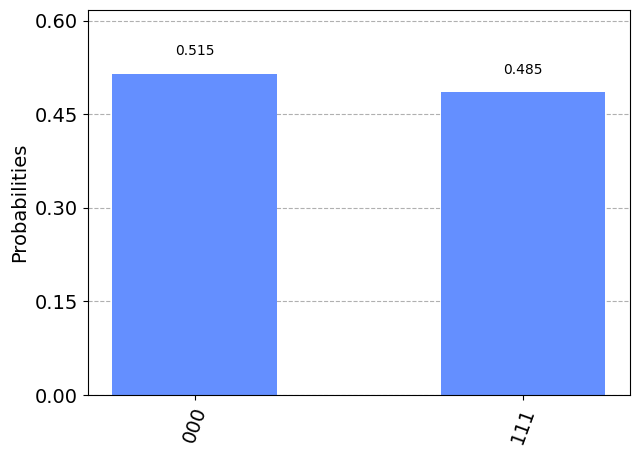

In [3]:
simulator = Aer.get_backend('qasm_simulator')
simulation_result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(simulation_result.get_counts())

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
devices = provider.backends(n_qubits=5, operational=True, simulator=False)
device = least_busy(devices)

In [5]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

6303f2afac8baf3c8362a346
Job Status: job has successfully run


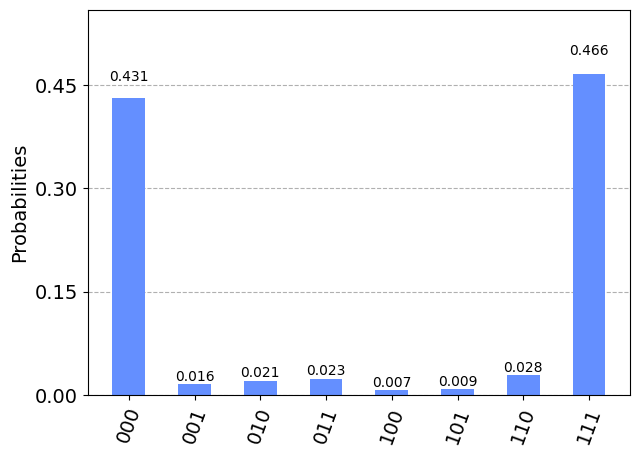

In [6]:
device_result = job.result()
plot_histogram(device_result.get_counts())

In [7]:
from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter
cal_circuits, state_labels = complete_meas_cal(qr= circuit.qregs[0], circlabel='measerrormitigationcal')

In [8]:
print(cal_circuits)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f16523060d0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f16523062b0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1652306d60>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f165b6f90a0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1658ef2100>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f165234f8e0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1652306cd0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1652306880>]


In [9]:
len(cal_circuits)

8

In [10]:
cal_job = execute(cal_circuits, backend=device, shots=1024, optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)

63040151ac8baf495c62a359
Job Status: job has successfully run


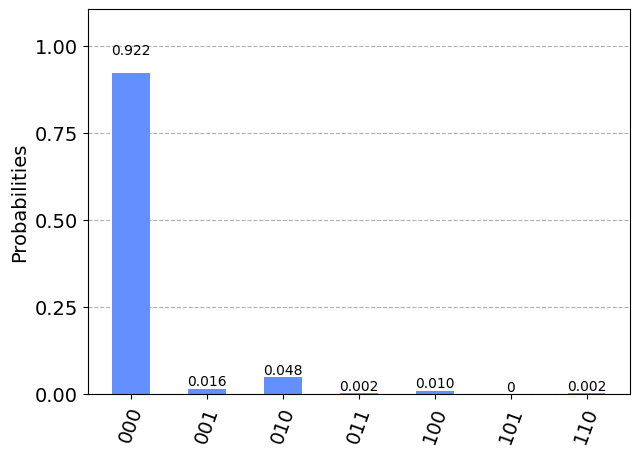

In [11]:
cal_circuits_result = cal_job.result()
plot_histogram(cal_circuits_result.get_counts(cal_circuits[0]))

In [12]:
meas_fitter = CompleteMeasFitter(cal_circuits_result, state_labels)
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)

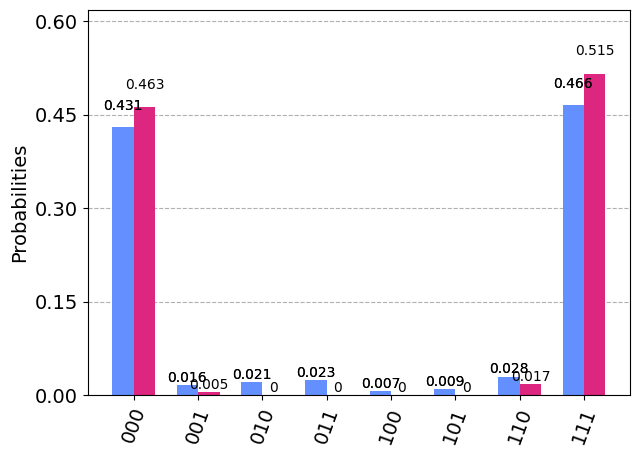

In [13]:
plot_histogram([device_result.get_counts(), mitigated_result.get_counts()])

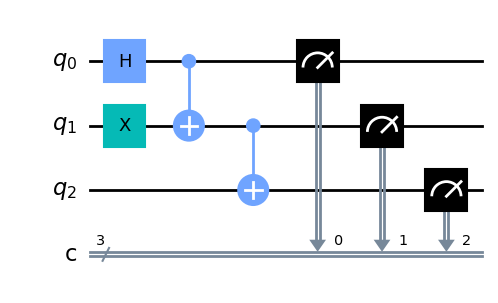

In [14]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw('mpl')

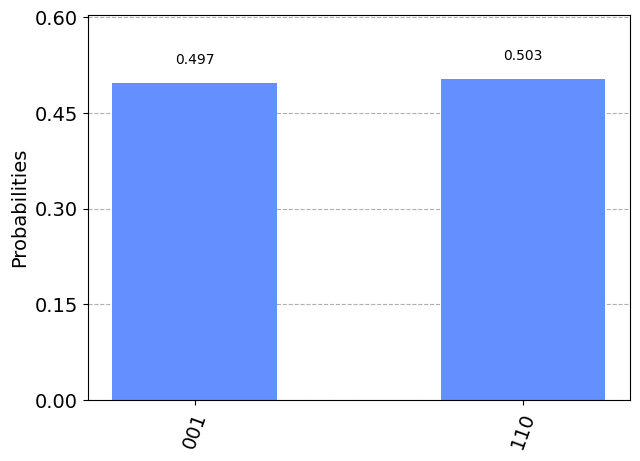

In [15]:
plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts())

In [16]:
job2 = execute(circuit2, backend=device, shots=1024)
print(job2.job_id())
job_monitor(job2)

63040f6ab3145c3440807b1f
Job Status: job has successfully run


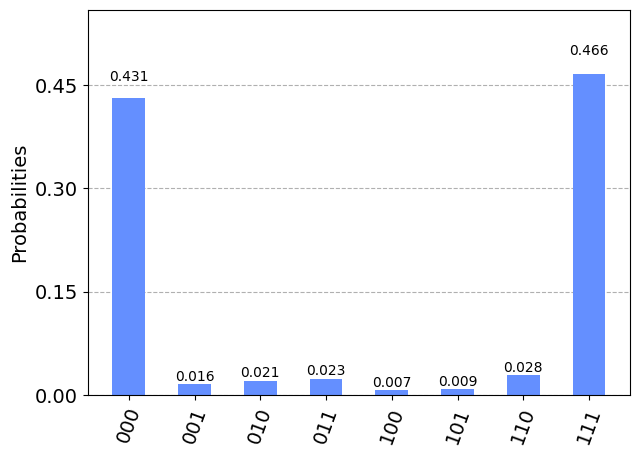

In [17]:
device_result2 = job.result()
plot_histogram(device_result2.get_counts())

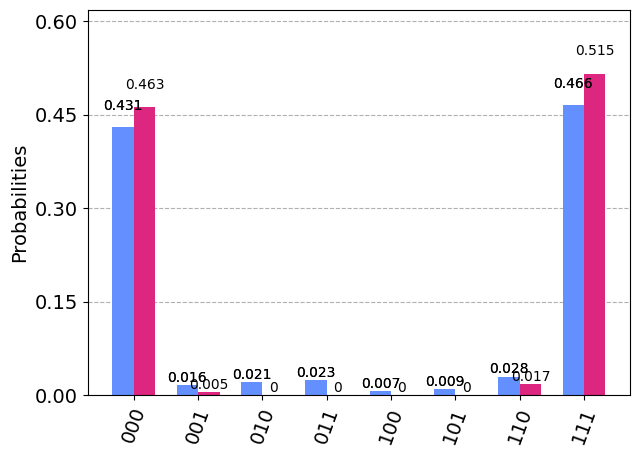

In [18]:
mitigated_result2 = meas_filter.apply(device_result2)
plot_histogram([device_result2.get_counts(), mitigated_result2.get_counts()])